# section 7- Logisitic Regression 
#import LabelEncoder or oneHotEncoder from sklearn.preprocessing, or getDumies from pandas to convert the object
#(string) data to numerical labels enabling the model to handle it.
#one-hot-encoder done by a ready function or by pandas.get_dummies(data, columns, drop_first).
#this categorical data encoding usually done with target output.

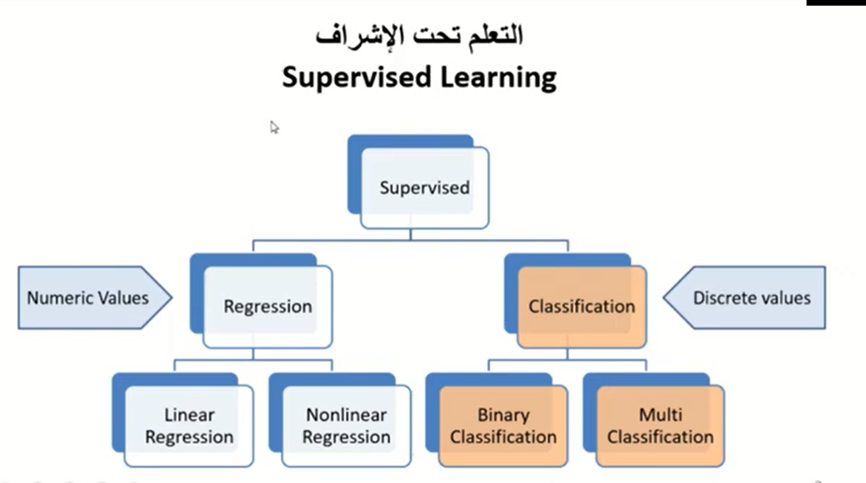

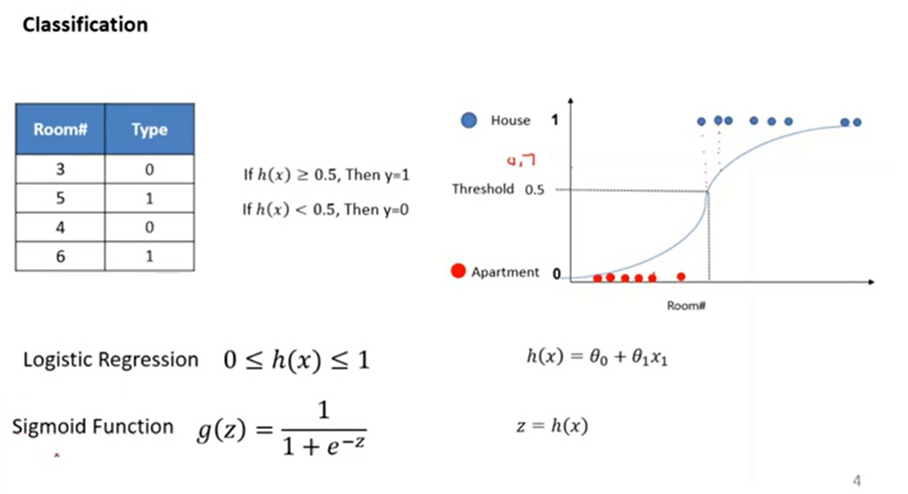

# Linear Regression evaluation metrics

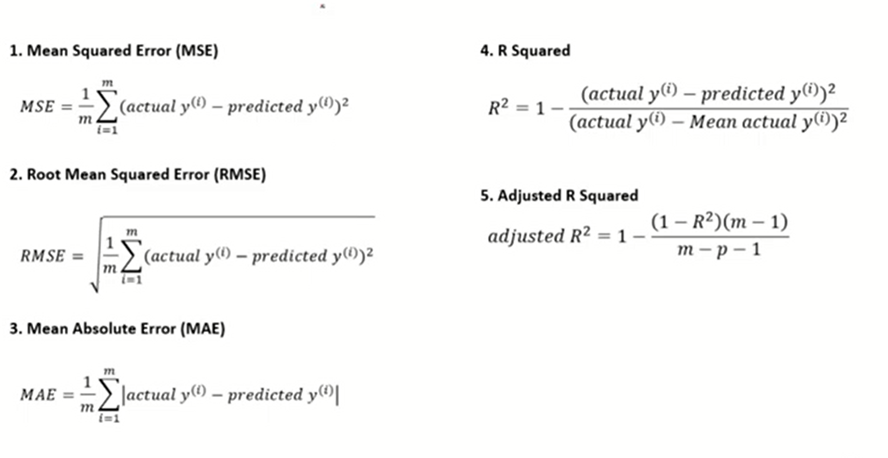

# Logistic Regression Evaluation Mertrics

Confusion Matrix 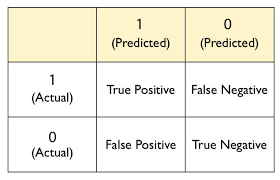

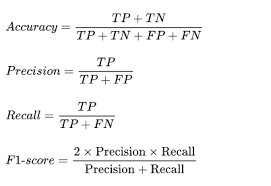

# **1- import libraries**

In [2]:
# Importing necessary libraries for data preprocessing and modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import classification_report, accuracy_score


# **2- Explore and Clean the Data**

In [3]:

df = pd.read_csv('HeartAttack.csv', na_values='?')
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,13 2,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


In [4]:
df.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num  '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   gender    294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    object 
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 32.3+ KB


In [6]:
df.isnull().sum()

age           0
gender        0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

In [7]:
# Remove columns 'slope', 'ca', and 'thal' from the DataFrame 'df'.
# The 'axis=1' argument indicates that we are dropping columns, not rows.
df = df.drop(['slope', 'ca', 'thal'], axis=1)

#‘num ‘ is the target, a value of 1 shows the presence of heart disease in the patient, otherwise 0.
#Let’s rename the target variable num to target, and also print out the classes and their counts.
df = df.rename(columns={'num  ': 'target'})
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,13 2,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219,0.0,1.0,150.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393,0.0,0.0,110.0,1.0,1.0,1


In [8]:
df['target'].value_counts()

0    188
1    106
Name: target, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   gender    294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    object 
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 25.4+ KB


In [10]:
# Create a copy of the DataFrame 'df' after dropping rows with missing values (NaN).
# This ensures that we have a clean DataFrame without missing data.
df = df.dropna().copy()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   gender    261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    object 
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 24.5+ KB


In [12]:
# Calculate and display the count of each unique value in the 'target' column of the DataFrame 'df'.
df.target.value_counts()


0    163
1     98
Name: target, dtype: int64

The ten features we’ll be using are:

**age:** age in years

**gender:** gender (1 = male; 0 = female)

**cp:** chest pain type
1.   : typical angina  الذبحة الصدرية النموذجية
2.   : atypical angina الذبحة الصدرية غير النمطية
3.   : non-anginal pain
4.   : asymptomatic

**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**chol:** serum cholesterol in mg/dl 

**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg:** resting electrocardiographic results
0.   : normal
1.   : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2.   : showing probable or definite left ventricular hypertrophy by Estes’ criteria


**thalach:** maximum heart rate achieved

**exang:** exercise-induced angina (1 = yes; 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest
We can also take a quick look at the data itself by printing out the dataset.

In [13]:
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,13 2,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393,0.0,0.0,110.0,1.0,1.0,1


Text(0.5, 1.0, 'Correlation Heatmap of Dataset')

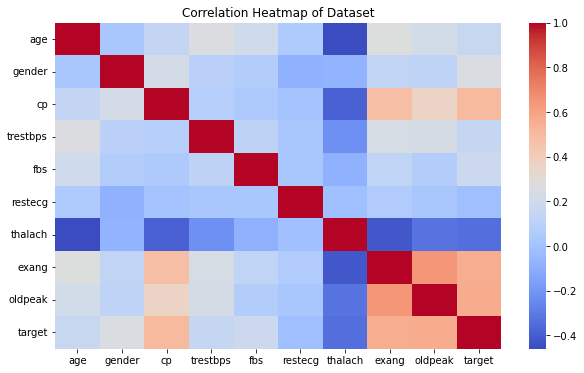

In [14]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Dataset")


We have five categorical variables: gender, cp, fbs, restecg, and exang, and five numerical variables being the rest.